<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 07: Lab - Array processing - Statement</font></p>
</p></br>
</p>
</CENTER>


----------------------------

The goal of this lab is to implement a simple, data independent, beamforming technique using a linear array of $N$ equispaced sensors.
$\Delta$ will denote the distance between successive sensors,
$(s_{k,t})_{k=1,p}$ the $p$ signals received on the first sensor at time $t$ from remote transmitters. The noise received on sensors is denoted by ${\bf w}_t =[w_{1,t},\ldots,w_{N,t}]^T$ and the vector of observed complex signal by ${\bf r}_t$.

Signals are asumed narrowband, that is, their bandwidth is much smaller than their central frequency. Letting 
$\theta_k$ denote the angle of the signal impinging from source $k$, measured relatively to the normal to the sensors array and $f$ the central frequency of signals the resulting phase shift for this signal between successive sensors will be dented by $\phi_k$.

# <span style="color:#00B8DE"> I - data independant beamforming</span>

We consider $N=6$ sensors and $p=2$ sources in respective directions $0°$ and $30°$.

**1)** What is the expression of $\phi_k$ as a function of $f$, $\Delta$, $\theta_k$ and of propagation speed $c$.

------------

### Answer 
\begin{equation}
    ϕ_k = 2 π θ_k f Δ \frac{sin(θ_k)}{c}
\end{equation}

-------------

Observation ${\bf r}_t$ is expressed as 

\begin{equation}
{\bf r}_t = \sum_{k=1,p} s_{k,t}\; {\bf d}(\phi_k) +  {\bf w}_t,
\end{equation}

where ${\bf d}(\phi_k)=[1,e^{i\phi_k},e^{2i\phi_k},\ldots,e^{(N-1)i\phi_k}]^T$
is often called the {\it steering vector})of source $k$.

We want to estimate a source signal, say $s_1(t)$, assuming that its direction is known. Contributions of other signals and noise are summerized in a vector denoted by ${\bf b}_t$ that represent the set of undesired contributions with respect to $s_{1,t}$~:

\begin{equation}
{\bf r}_t =  s_{1,t} {\bf d}(\phi_1) + (\sum_{k=2,p} s_{k,t} {\bf
  d}(\phi_k) +  {\bf w}_t) = s_{1,t} {\bf d}(\phi_1) + {\bf b}_t.
\end{equation}

Beamforming aims at realizing a linear combination of the entries of observation vector ${\bf r}_t$ 
so as to get an estimate $\hat{s}_1(t)$ of $s_1(t)$. In a vector form, beamforming is described by a weighing vector ${\bf h}=[{\bf h}_1,\ldots,{\bf h}_n]^T$ such that

\begin{equation}
\hat{s}_{1,t} = \sum_{n=1,N}{\bf h}_n^*{\bf r}_{t,n} = {\bf h}^H{\bf r}_t.
\end{equation}

**2)** Give the expression of the beamforming vector ${\bf h}$ that performs phase correction of the useful part of the received signal vector. We shall denote by ${\bf h}_{0}$ this beamforming. 


------------

### Answer 

${\bf h}_{0}=d(ϕ)_k$

Gain = \frac{SNR_{PR}}{SNR_{R_0}}

------------

**3)** Complete the code supplied to achieve the beamforming fourni. Plot estimated $s_{1,t}$ and the array pattern of the antenna. in the code, observation is formed by contribution of both sources and noise. 
What do you observe?

In [1]:
using Plots
pyplot()

┌ Info: Recompiling stale cache file /homes/g18quint/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Warning: Module JSON with build ID 8416509577435 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1017
┌ Info: Recompiling stale cache file /homes/g18quint/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240
┌ Warning: Module Conda with build ID 8417323221408 is missing from the cache.
│ This may mean Conda [8f4d0f93-b110-5947-807f-2305c1781a2d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Warning: Module Conda with build ID 8417323221408 is missi

Plots.PyPlotBackend()

In [53]:
N     = 6;                  # number of sensors
θ     = (π/180)*[0,30]      # phase of sources
T     = 1000                # number of observation vectors
SNR   = 15                   # signal o noise ratio
σ_s = 1
σ     = σ_s * 10^(-SNR/10)                 # noise std (signals power = 1)

s = hcat(sign.(sin.(2π*0.01*(1:T))),sqrt(2)*cos.(2*π*0.005*(1:T)))'
# Signals generation
#-------------------
function noise(N,T)
    (randn(N,T)+im*randn(N,T))/sqrt(2)
end
data = exp.(im*(0:N-1)*θ') * s + σ * noise(N,T);

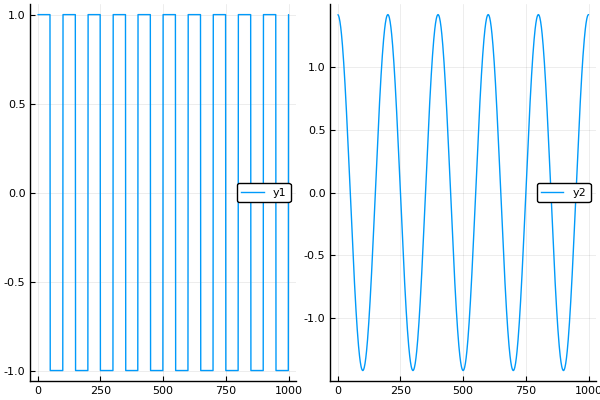

In [57]:
plot(s',layout=(1,2))

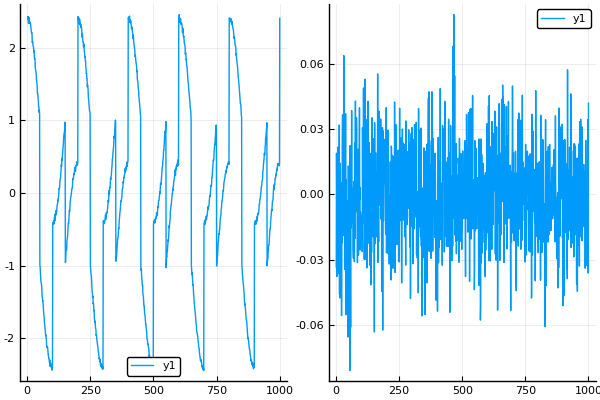

In [55]:
p1 = plot(real(data[1,:]))
p2 = plot(imag(data[1,:]))
plot(p1,p2,layout=(1,2))

In [97]:
# Beamformer based on phase correction
#--------------------------------------
N     = 6
f = 1
Δ = 1
c = 1

# Beamformer source 1
ϕ = 2*π*f*Δ/c*[sin(θ[1]) sin(θ[2])]'

h_0     = (1/N)*exp.(im*(0:N-1)*θ[1])               # beamformer vector
Z_0     = h_0'*data               # beamformer output
phase = range(-180,180,length=361)
p3 = plot(1:T,[real.(Z_0)',s[1,:]],label="",title="h_0: source 1");
p4 = plot(phase, abs.((h_0'*exp.(im*(0:N-1)*((π/180)*phase')))'), label="array pattern");

# Beamformer source 2
h_0     = (1/N)*exp.(im*(0:N-1)*θ[2])               # beamformer vector
Z_0     = h_0'*data               # beamformer output
phase = range(-180,180,length=361)
p5 = plot(1:T,[real.(Z_0)',s[1,:]],label="",title="h_0: source 1");
p6 = plot(phase, abs.((h_0'*exp.(im*(0:N-1)*((π/180)*phase')))'), label="array pattern");

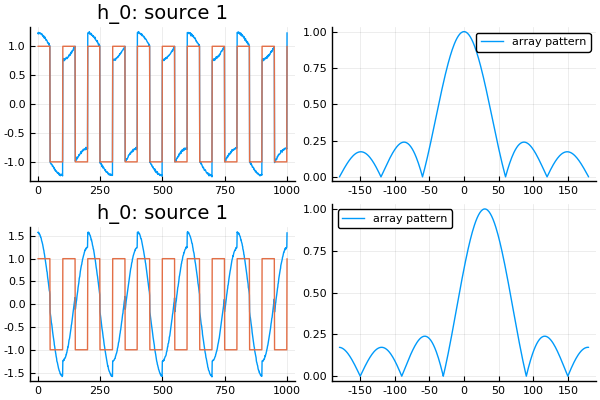

In [98]:
plot(p3,p4,p5,p6,layout=(2,2))

We observe that source signals are well reconstructed but that there is some interference between sources because beamformers do not cancel in the direction of the undesired source.

**4)** Compute the array pattern as a function of the the number of sensors. Comments?

**5)** For white spatial noise plot the evolution of the SINR for the first source at the array output as a function of the number of sensors. Conclusion? 

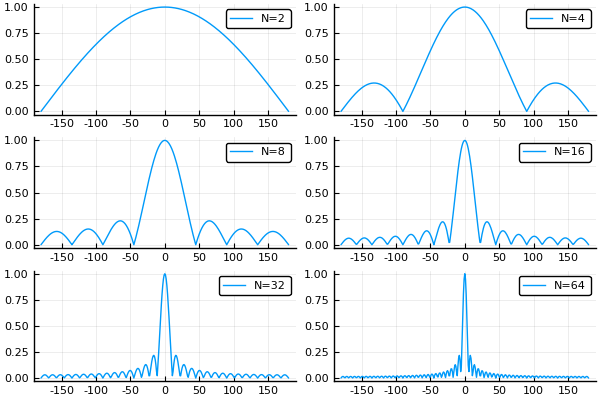

In [100]:
kmax    = 6
SINR_0  = zeros(kmax)  # signal to noise plus interference ratio
dd      = Dict()

for k=1:kmax
    N         = 2^k
    data = exp.(im*(0:N-1)*θ') * s + σ * noise(N,T);
    h_0       = (1/N)*exp.(im*(0:N-1)*θ[1])  # beamformer vector
    Z_0       = h_0'*data  # beamformer output
    diagramme = abs.((h_0'*exp.(im*(0:N-1)*((π/180)*phase')))')
    dd["BF$k"] = plot(phase,diagramme,label="N=$N")
end

plot(dd["BF1"],dd["BF2"],dd["BF3"],dd["BF4"],dd["BF5"],dd["BF6"],layout=(3,2))